## Observations and Insights 

In [375]:
pip install us

Note: you may need to restart the kernel to use updated packages.


In [376]:
# Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import us

In [377]:
#file = './landfilldata.csv'
#Pull in the landfill data into a dataframe
landfill_df=pd.read_csv('https://raw.githubusercontent.com/LCHoffman/Project_1/Lindsey/county_names.csv')
#landfill_df= pd.read_csv

landfill_df

,Unnamed: 0,Landfill Name,State,County
0,0,Anchorage Regional Landfill,AK,Anchorage
1,1,Capitol Disposal Landfill,AK,Juneau
2,2,Central Peninsula Landfill (CPL),AK,Kenai Peninsula
3,5,Palmer Central Landfill,AK,Matanuska-Susitna
4,6,South Cushman Landfill,AK,Fairbanks North Star
...,...,...,...,...
845,2621,Tucker County Landfill,WV,Tucker
846,2623,Wetzel County Landfill,WV,Wetzel
847,2625,Casper Balefill,WY,Natrona
848,2626,Cheyenne Landfill,WY,Laramie


In [378]:
landfill_df['Landfill Name'].value_counts()

Oak Grove Landfill                              2
Concord Suncook Road Landfill Pre-1981          1
Cedar Ridge Recycling & Disposal Facility       1
Watauga County Landfill                         1
Apache County Regional Landfill - Blue Hills    1
                                               ..
Itasca Landfill                                 1
South Hilo Sanitary Landfill (SHSL)             1
Northside LF                                    1
Gratio LF                                       1
ELDA RDF                                        1
Name: Landfill Name, Length: 849, dtype: int64

In [379]:
landfill_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     850 non-null    int64 
 1   Landfill Name  850 non-null    object
 2   State          850 non-null    object
 3   County         850 non-null    object
dtypes: int64(1), object(3)
memory usage: 26.7+ KB


In [380]:
#file = './County_Cancer_Data.csv'
#Pull in the County Cancer Data data into a dataframe
County_Cancer_Data_df=pd.read_csv('https://raw.githubusercontent.com/LCHoffman/Project_1/Robert/cancer_export_df.csv')
Split= County_Cancer_Data_df["County"].str.split(" C", n = 1, expand = True)
#County_Cancer_Data_df["County"] = County_Cancer_Data_df["County"].replace('County', '')

#County_Cancer_Data_df
County_Cancer_Data_df["County"]=Split[0]
County_Cancer_Data_df

,County,State,"Age-Adjusted Incidence Rate - cases per 100,000",Average Annual Count,Recent Trend
0,Los Angeles,California,380.3,39939,falling
1,Cook,Illinois,448.9,25748,falling
2,Maricopa,Arizona,394.2,17933,falling
3,Harris,Texas,395.1,15735,falling
4,San Diego,California,417.7,14412,falling
...,...,...,...,...,...
2929,McMullen,Texas,283.6,4,*
2930,Terrell,Texas,288.5,4,*
2931,Hayes,Nebraska,290.1,3,*
2932,Roberts,Texas,235.9,3,*


In [381]:
County_Cancer_Data_df['Average Annual Count'].value_counts()

59      23
37      19
103     17
102     17
29      16
        ..
295      1
2336     1
6402     1
2286     1
2068     1
Name: Average Annual Count, Length: 977, dtype: int64

In [382]:
us_state_abbrev = {
    ' Alabama': 'AL',
    ' Alaska': 'AK',
    ' American Samoa': 'AS',
    ' Arizona': 'AZ',
    ' Arkansas': 'AR',
    ' California': 'CA',
    ' Colorado': 'CO',
    ' Connecticut': 'CT',
    ' Delaware': 'DE',
    ' District of Columbia': 'DC',
    ' Florida': 'FL',
    ' Georgia': 'GA',
    ' Guam': 'GU',
    ' Hawaii': 'HI',
    ' Idaho': 'ID',
    ' Illinois': 'IL',
    ' Indiana': 'IN',
    ' Iowa': 'IA',
    ' Kansas': 'KS',
    ' Kentucky': 'KY',
    ' Louisiana': 'LA',
    ' Maine': 'ME',
    ' Maryland': 'MD',
    ' Massachusetts': 'MA',
    ' Michigan': 'MI',
    ' Minnesota': 'MN',
    ' Mississippi': 'MS',
    ' Missouri': 'MO',
    ' Montana': 'MT',
    ' Nebraska': 'NE',
    ' Nevada': 'NV',
    ' New Hampshire': 'NH',
    ' New Jersey': 'NJ',
    ' New Mexico': 'NM',
    ' New York': 'NY',
    ' North Carolina': 'NC',
    ' North Dakota': 'ND',
    ' Northern Mariana Islands':'MP',
    ' Ohio': 'OH',
    ' Oklahoma': 'OK',
    ' Oregon': 'OR',
    ' Pennsylvania': 'PA',
    ' Puerto Rico': 'PR',
    ' Rhode Island': 'RI',
    ' South Carolina': 'SC',
    ' South Dakota': 'SD',
    ' Tennessee': 'TN',
    ' Texas': 'TX',
    ' Utah': 'UT',
    ' Vermont': 'VT',
    ' Virgin Islands': 'VI',
    ' Virginia': 'VA',
    ' Washington': 'WA',
    ' West Virginia': 'WV',
    ' Wisconsin': 'WI',
    ' Wyoming': 'WY'}

In [383]:
def state_cleaner(stname):
    try:
        return(us_state_abbrev.get(stname))
    except:
        return("state not found")
    

In [384]:
County_Cancer_Data_df["Clean State"]=County_Cancer_Data_df.State.apply(state_cleaner)

In [385]:
# Combine the data into a single dataset
Combined_data_df = pd.merge(landfill_df, County_Cancer_Data_df, left_on = ["County", "State"], right_on=["County", "Clean State"], how="left")

Combined_data_df

,Unnamed: 0,Landfill Name,State_x,County,State_y,"Age-Adjusted Incidence Rate - cases per 100,000",Average Annual Count,Recent Trend,Clean State
0,0,Anchorage Regional Landfill,AK,Anchorage,NaN,NaN,NaN,NaN,NaN
1,1,Capitol Disposal Landfill,AK,Juneau,NaN,NaN,NaN,NaN,NaN
2,2,Central Peninsula Landfill (CPL),AK,Kenai Peninsula,NaN,NaN,NaN,NaN,NaN
3,5,Palmer Central Landfill,AK,Matanuska-Susitna,NaN,NaN,NaN,NaN,NaN
4,6,South Cushman Landfill,AK,Fairbanks North Star,Alaska,386.2,317.0,falling,AK
...,...,...,...,...,...,...,...,...,...
848,2621,Tucker County Landfill,WV,Tucker,West Virginia,527.4,59.0,falling,WV
849,2623,Wetzel County Landfill,WV,Wetzel,West Virginia,499.3,117.0,stable,WV
850,2625,Casper Balefill,WY,Natrona,Wyoming,419.9,382.0,falling,WY
851,2626,Cheyenne Landfill,WY,Laramie,Wyoming,443.5,491.0,falling,WY


In [386]:
#Combined_data_df['Average Annual Count'].replace(np.nan, 0)
Combined_data_df=Combined_data_df.fillna(0)
Combined_data_df


,Unnamed: 0,Landfill Name,State_x,County,State_y,"Age-Adjusted Incidence Rate - cases per 100,000",Average Annual Count,Recent Trend,Clean State
0,0,Anchorage Regional Landfill,AK,Anchorage,0,0,0.0,0,0
1,1,Capitol Disposal Landfill,AK,Juneau,0,0,0.0,0,0
2,2,Central Peninsula Landfill (CPL),AK,Kenai Peninsula,0,0,0.0,0,0
3,5,Palmer Central Landfill,AK,Matanuska-Susitna,0,0,0.0,0,0
4,6,South Cushman Landfill,AK,Fairbanks North Star,Alaska,386.2,317.0,falling,AK
...,...,...,...,...,...,...,...,...,...
848,2621,Tucker County Landfill,WV,Tucker,West Virginia,527.4,59.0,falling,WV
849,2623,Wetzel County Landfill,WV,Wetzel,West Virginia,499.3,117.0,stable,WV
850,2625,Casper Balefill,WY,Natrona,Wyoming,419.9,382.0,falling,WY
851,2626,Cheyenne Landfill,WY,Laramie,Wyoming,443.5,491.0,falling,WY


In [387]:
Combined_data_df.to_csv (r'C:\Users\nagen\OneDrive\Documents\GitHub\GT-ATL-DATA-PT-09-2020-U-C-2, Combined_data_df8.csv', index = False, header = True)

In [388]:
Combined_Landfilldata_df_counts = Combined_data_df["Landfill Name"].value_counts()
#Combined_data_df["Landfill Name"].value_counts()
Combined_Landfilldata_df_counts

Eastern Sanitary Landfill Solid Waste Management Facility (ESL)    2
Roanoke Regional Landfill                                          2
Oak Grove Landfill                                                 2
I-66 Landfill                                                      2
Concord Suncook Road Landfill Pre-1981                             1
                                                                  ..
Itasca Landfill                                                    1
South Hilo Sanitary Landfill (SHSL)                                1
Northside LF                                                       1
Gratio LF                                                          1
ELDA RDF                                                           1
Name: Landfill Name, Length: 849, dtype: int64

In [389]:
Combined_data_df_cancer_rate_counts = Combined_data_df["Average Annual Count"].value_counts()
#Combined_data_df["Average Annual Count"].value_counts()
Combined_data_df_cancer_rate_counts

0.0        87
555.0       5
317.0       5
127.0       4
113.0       4
           ..
10313.0     1
1297.0      1
706.0       1
1691.0      1
863.0       1
Name: Average Annual Count, Length: 588, dtype: int64

## Line and Scatter Plots

In [390]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
Combined_data_df=pd.read_csv("https://raw.githubusercontent.com/LCHoffman/Project_1/Lindsey/project_1%20HW%20files%2C%20Combined_data_df4.csv")
Combined_data_df

,Unnamed: 0,Landfill Name,Physical Address,City,State_x,County,Zip Code,Latitude,Longitude,State_y,"Age-Adjusted Incidence Rate - cases per 100,000",Average Annual Count,Recent Trend,Clean State
0,0.0,Anchorage Regional Landfill,15500 E. Eagle River Loop Road,Eagle River,AK,Anchorage,99577,61.293281,-149.602138,0,0,0.0,0,0
1,4.0,Merrill Field Landfill,800 Merrill Field Drive,Anchorage,AK,Anchorage,99501,61.212660,-149.840120,0,0,0.0,0,0
2,1.0,Capitol Disposal Landfill,5600 Tonsgard Court,Juneau,AK,Juneau,99801,58.352800,-134.494700,0,0,0.0,0,0
3,2.0,Central Peninsula Landfill (CPL),46915 Sterling Highway,Soldotna,AK,Kenai Peninsula,99669,60.447140,-151.103690,0,0,0.0,0,0
4,5.0,Palmer Central Landfill,1201 N. 49th State Street\nJust off the Palmer...,Palmer,AK,Matanuska-Susitna,99645,61.590000,-149.210000,0,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4738,0.0,0,0,0,0,McMullen County,0,0.000000,0.000000,Texas,283.6,4.0,*,TX
4739,0.0,0,0,0,0,Terrell County,0,0.000000,0.000000,Texas,288.5,4.0,*,TX
4740,0.0,0,0,0,0,Hayes County,0,0.000000,0.000000,Nebraska,290.1,3.0,*,NE
4741,0.0,0,0,0,0,Roberts County,0,0.000000,0.000000,Texas,235.9,3.0,*,TX


In [391]:

#Combined_data_df_drop = Combined_data_df.drop(Combined_data_df[Combined_data_df['Clean State'].isin(["0"])].index)
#Combined_data_df_drop

In [392]:
Landfill_count=len("Landfill Name")
Landfill_count

13

In [393]:
Combined_data_df['Landfill Name'].nunique()

1789

In [394]:
Combined_data_df.agg(['count', 'size', 'nunique'])

,Unnamed: 0,Landfill Name,Physical Address,City,State_x,County,Zip Code,Latitude,Longitude,State_y,"Age-Adjusted Incidence Rate - cases per 100,000",Average Annual Count,Recent Trend,Clean State
count,4743,4743,4743,4743,4743,4743,4743,4743,4743,4743,4743,4743,4743,4743
size,4743,4743,4743,4743,4743,4743,4743,4743,4743,4743,4743,4743,4743,4743
nunique,1811,1789,1800,1447,51,2628,1706,1800,1800,49,1621,978,5,49


In [395]:
#Landfill_count_state_df= Combined_data_df.groupby('Clean State', "Landfill Name")['County'].nunique()
#Landfill_count_state
Cancer_count_state_df = Combined_data_df.groupby('Average Annual Count')['Clean State'].cumcount()
Cancer_count_state_df

0        0
1        1
2        2
3        3
4        4
        ..
4738    12
4739    13
4740     0
4741     1
4742     2
Length: 4743, dtype: int64

In [396]:
Combined_data_df=pd.read_csv("https://raw.githubusercontent.com/LCHoffman/Project_1/Lindsey/project_1%20HW%20files%2C%20Combined_data_df4.csv")
Combined_data_df
#Create an object that shows the NUMBER of landfills PER STATE
state_df = Combined_data_df[['Landfill Name', 'Clean State']]
grouped_by_state_df = state_df.groupby("Clean State")

landfill_count = grouped_by_state_df["Landfill Name"].count()
landfill_count_df = landfill_count.to_frame()
landfill_count_df.reset_index(level=None, drop=False, inplace=False, col_level=0, col_fill='')

,Clean State,Landfill Name
0,0,1810
1,AK,26
2,AL,67
3,AR,75
4,AZ,15
5,CA,58
6,CO,63
7,CT,8
8,DE,3
9,FL,67


In [397]:
Combined_data_df=pd.read_csv("https://raw.githubusercontent.com/LCHoffman/Project_1/Lindsey/project_1%20HW%20files%2C%20Combined_data_df4.csv")
Combined_data_df
#Create an object that shows the NUMBER of landfills PER STATE
cancer_rate_df = Combined_data_df[['Average Annual Count', 'Clean State']]
grouped_by_state_df = cancer_rate_df.groupby("Clean State")

cancer_count = grouped_by_state_df["Average Annual Count"].sum()
cancer_count_df = cancer_count.to_frame()



cancer_count_df.reset_index(level=None, drop=False, inplace=False, col_level=0, col_fill='')


,Clean State,Average Annual Count
0,0,2837.0
1,AK,2862.0
2,AL,26346.0
3,AR,16903.0
4,AZ,31453.0
5,CA,168606.0
6,CO,23152.0
7,CT,21014.0
8,DE,5831.0
9,FL,126556.0


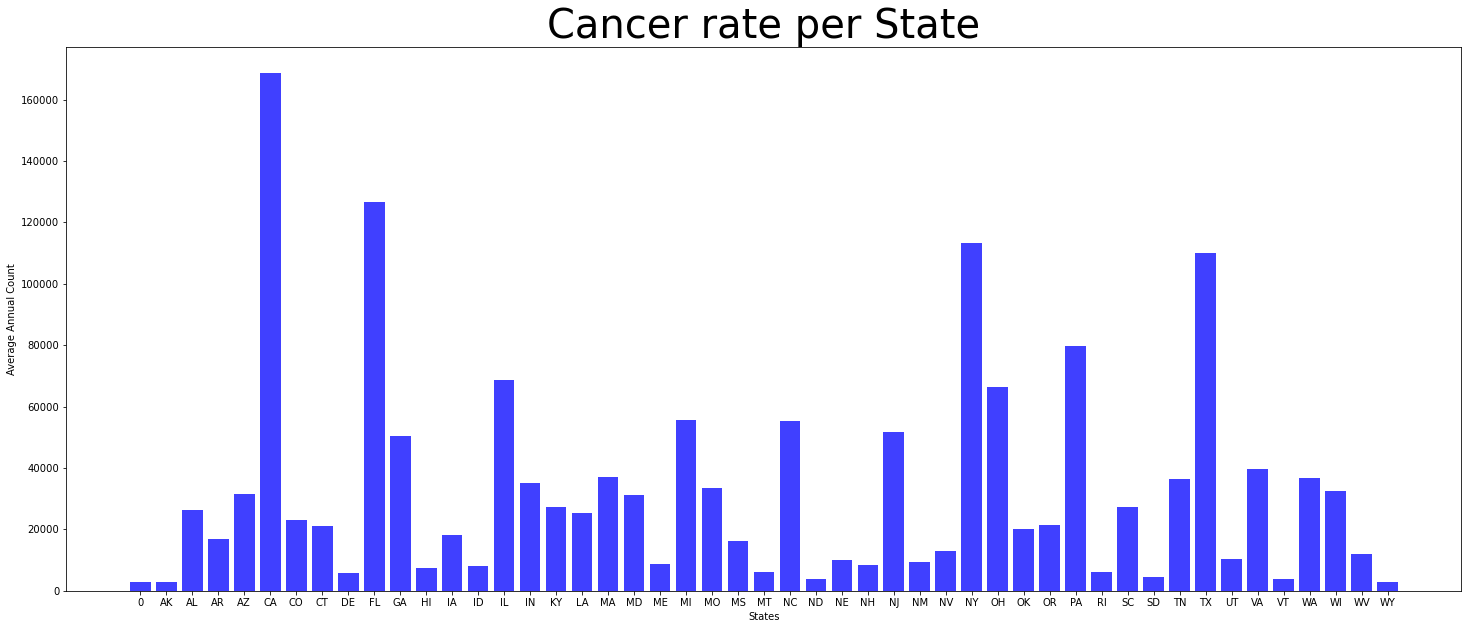

In [398]:
#Bar Graph showing number of Landfills per State
x_axis = np.arange(len(cancer_count_df))
tick_locations = [value for value in x_axis]

plt.figure(figsize=(25,10))
plt.bar(x_axis, cancer_count_df["Average Annual Count"], color='b', alpha=0.75)
plt.xticks(tick_locations, list(cancer_count.index))
plt.title("Cancer rate per State", fontsize=40)
plt.xlabel('States')
plt.ylabel('Average Annual Count')
plt.savefig("C:\\Users\\nagen\\OneDrive\\Documents\\GitHub\\GT-ATL-DATA-PT-09-2020-U-C-2\\landfills_per_state.png")

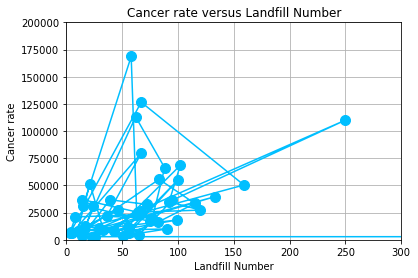

In [399]:
#y_axis = np.arange(len(cancer_count_df))
#x_axis = np.arange(len(landfill_count_df))

plt.plot(landfill_count_df, cancer_count_df, marker="o", markersize=10, color="deepskyblue")

# Set up plot title, xlable, and ylabel
plt.title("Cancer rate versus Landfill Number")
plt.xlabel('Landfill Number')
plt.ylabel('Cancer rate')

# Set up plot xlim
plt.xlim(0, 300)
plt.ylim(0, 200000)

# Add grid onto plot background
plt.grid()
plt.savefig("C:\\Users\\nagen\\OneDrive\\Documents\\GitHub\\GT-ATL-DATA-PT-09-2020-U-C-2\\landfills_per_state_linechart.png")